In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams

In [2]:
data=pd.read_csv('Dataset/Telco Raw.csv')

In [3]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
# preview the data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors = 'coerce')

# for x in churn.columns:
#     if churn[x].isnull().values.ravel().sum() > 0:
#         print('{} - {}'.format(x,churn[x].isnull().values.ravel().sum()))
        
# churn['TotalCharges'].fillna(churn['tenure'] *  churn['MonthlyCharges'], inplace = True)

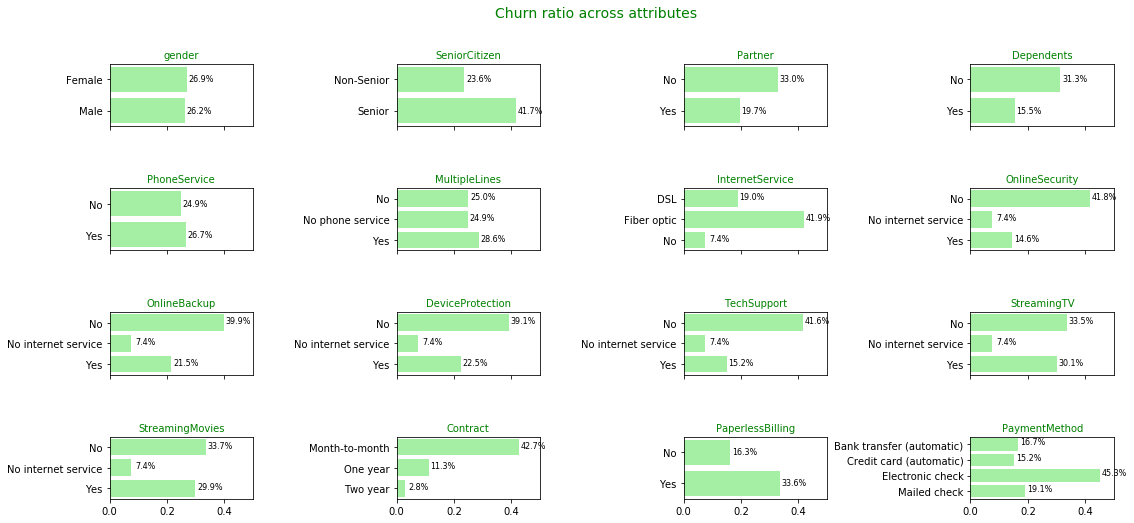

In [6]:
data['SeniorCitizen'] = data['SeniorCitizen'].apply(lambda x: "Senior" if x==1 else ("Non-Senior" if x==0 else x))

cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, ax = plt.subplots(4,4,figsize=(18,8), sharex=True)

j=0
k=0
    
for i in cols:
    temp = data.pivot_table(data, index=[i], columns=['Churn'], aggfunc=len).reset_index()[[i,'tenure']]
    temp.columns=[i,'Churn_N','Churn_Y']
    temp['Churn_ratio']=(temp['Churn_Y'])/(temp['Churn_Y']+temp['Churn_N'])
    
    a = sns.barplot(x='Churn_ratio', y=i, data=temp, ax=ax[j][k], color="palegreen")
    a.set_yticklabels(labels=temp[i])
    for p in ax[j][k].patches:
        ax[j][k].text(p.get_width() + .05, p.get_y() + p.get_height()/1.5, '{:,.1%}'.format(p.get_width()),
                   fontsize=8, color='black', ha='center', va='bottom')
    ax[j][k].set_xlabel('', size=8, color="green")
    ax[j][k].set_ylabel('', size=8, color="green", rotation=0, horizontalalignment='right')
    ax[j][k].set_title(i, size=10, color="green")
    #print(j,k)
    if k==3: 
        j=j+1
        k=0
    else:
        k=k+1 
    
fig.suptitle("Churn ratio across attributes", fontsize=14, family='sans-serif', color="green")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=1, hspace=1)
plt.xlim(0,.5)
plt.show()

In [7]:
#drop customer id karena tidak kepake
data.drop(['customerID'], axis=1, inplace=True)

In [8]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Non-Senior,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,Non-Senior,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,Non-Senior,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,Non-Senior,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,Non-Senior,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
data['Churn'].value_counts(sort=False)

No     5174
Yes    1869
Name: Churn, dtype: int64

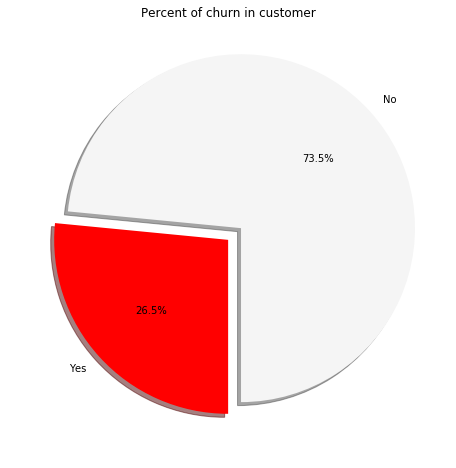

In [10]:
# Data to plot
labels =data['Churn'].value_counts(sort = True).index
sizes = data['Churn'].value_counts(sort = True)


colors = ["whitesmoke","red"]
explode = (0.1,0)  # explode 1st slice
 
rcParams['figure.figsize'] = 8,8
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percent of churn in customer')
plt.show()

In [11]:
#mengubah jadi kelas dimana churn 1 dan non churn 2
data['Churn'] = data['Churn'].map(lambda s :1  if s =='Yes' else 2)

In [12]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,Non-Senior,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,2
1,Male,Non-Senior,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,2
2,Male,Non-Senior,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,Non-Senior,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,2
4,Female,Non-Senior,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(2), object(17)
memory usage: 1.1+ MB


In [14]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(6)

,Total,Percent
Churn,0,0.0
TotalCharges,0,0.0
SeniorCitizen,0,0.0
Partner,0,0.0
Dependents,0,0.0
tenure,0,0.0


In [15]:
#Mengubah senior citizen dimana jika senior akan bernilai 1 dan non senior akan bernilai 2
data['SeniorCitizen'] = data['SeniorCitizen'].map(lambda s :1  if s =='Senior' else 2)

In [16]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,2,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,2
1,Male,2,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,2
2,Male,2,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,2,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,2
4,Female,2,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [17]:
#ganti jadi male=1 fmale=2
data['gender'] = data['gender'].map(lambda s :1  if s =='Male' else 2)

In [18]:
data['gender'].head()

0    2
1    1
2    1
3    1
4    2
Name: gender, dtype: int64

In [19]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,2
1,1,2,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,2
2,1,2,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,2,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,2
4,2,2,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [20]:
#parner=1 non partner=2
data['Partner'] = data['Partner'].map(lambda s :1 if s =='Yes' else 2)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,1,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,2
1,1,2,2,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,2
2,1,2,2,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,1,2,2,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,2
4,2,2,2,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [22]:
# sama untuk Dependents, PhoneService, PaperlessBilling
data['Dependents'] = data['Dependents'].map(lambda s :1  if s =='Yes' else 2)
data['PhoneService'] = data['PhoneService'].map(lambda s :1  if s =='Yes' else 2)
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda s :1  if s =='Yes' else 2)

In [23]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,1,2,1,2,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,2,Electronic check,29.85,29.85,2
1,1,2,2,2,34,2,No,DSL,Yes,No,Yes,No,No,No,One year,2,Mailed check,56.95,1889.5,2
2,1,2,2,2,2,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,2,Mailed check,53.85,108.15,1
3,1,2,2,2,45,2,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,2,Bank transfer (automatic),42.30,1840.75,2
4,2,2,2,2,2,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,2,Electronic check,70.70,151.65,1


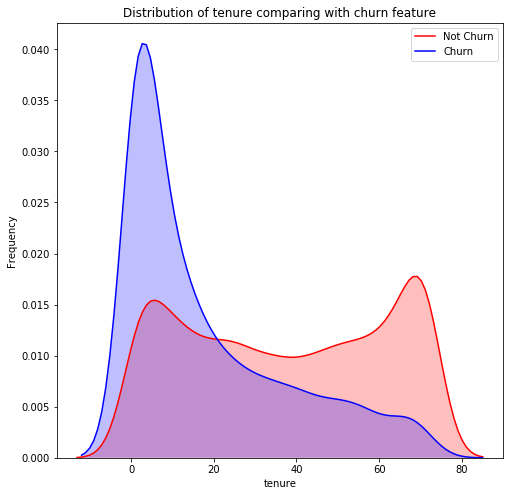

In [24]:
# distribusi lengkap dari tenture 
g = sns.kdeplot(data.tenure[(data["Churn"] == 2) ], color="Red", shade = True)
g = sns.kdeplot(data.tenure[(data["Churn"] == 1) ], ax =g, color="Blue", shade= True)
g.set_xlabel("tenure")
g.set_ylabel("Frequency")
plt.title('Distribution of tenure comparing with churn feature')
g = g.legend(["Not Churn","Churn"])

In [25]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,1,2,1,2,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,2,Electronic check,29.85,29.85,2
1,1,2,2,2,34,2,No,DSL,Yes,No,Yes,No,No,No,One year,2,Mailed check,56.95,1889.5,2
2,1,2,2,2,2,2,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,2,Mailed check,53.85,108.15,1
3,1,2,2,2,45,2,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,2,Bank transfer (automatic),42.30,1840.75,2
4,2,2,2,2,2,2,No,Fiber optic,No,No,No,No,No,No,Month-to-month,2,Electronic check,70.70,151.65,1


In [26]:
data['OnlineSecurity'] = data['OnlineSecurity'].map(lambda s :1  if s =='Yes' else 2)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda s :1  if s =='Yes' else 2)
data['DeviceProtection'] = data['DeviceProtection'].map(lambda s :1  if s =='Yes' else 2)
data['TechSupport'] = data['TechSupport'].map(lambda s :1  if s =='Yes' else 2)
data['StreamingTV'] = data['StreamingTV'].map(lambda s :1  if s =='Yes' else 2)
data['StreamingMovies'] = data['StreamingMovies'].map(lambda s :1  if s =='Yes' else 2)

In [27]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,1,2,1,2,No phone service,DSL,2,1,2,2,2,2,Month-to-month,2,Electronic check,29.85,29.85,2
1,1,2,2,2,34,2,No,DSL,1,2,1,2,2,2,One year,2,Mailed check,56.95,1889.5,2
2,1,2,2,2,2,2,No,DSL,1,1,2,2,2,2,Month-to-month,2,Mailed check,53.85,108.15,1
3,1,2,2,2,45,2,No phone service,DSL,1,2,1,1,2,2,One year,2,Bank transfer (automatic),42.30,1840.75,2
4,2,2,2,2,2,2,No,Fiber optic,2,2,2,2,2,2,Month-to-month,2,Electronic check,70.70,151.65,1


In [28]:
data['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(14), object(5)
memory usage: 1.1+ MB


In [30]:
for dataset in data:
    data['InternetService']=data['InternetService'].replace('Fiber optic', 1)
    data['InternetService']=data['InternetService'].replace('DSL', 2) 
    data['InternetService']=data['InternetService'].replace('No', 3)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,1,2,1,2,No phone service,2,2,1,2,2,2,2,Month-to-month,2,Electronic check,29.85,29.85,2
1,1,2,2,2,34,2,No,2,1,2,1,2,2,2,One year,2,Mailed check,56.95,1889.5,2
2,1,2,2,2,2,2,No,2,1,1,2,2,2,2,Month-to-month,2,Mailed check,53.85,108.15,1
3,1,2,2,2,45,2,No phone service,2,1,2,1,1,2,2,One year,2,Bank transfer (automatic),42.30,1840.75,2
4,2,2,2,2,2,2,No,1,2,2,2,2,2,2,Month-to-month,2,Electronic check,70.70,151.65,1


In [31]:
data['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [32]:
for dataset in data:
    data['MultipleLines']=data['MultipleLines'].replace('Yes', 1)
    data['MultipleLines']=data['MultipleLines'].replace('No', 2) 
    data['MultipleLines']=data['MultipleLines'].replace('No phone service', 3)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,1,2,1,2,3,2,2,1,2,2,2,2,Month-to-month,2,Electronic check,29.85,29.85,2
1,1,2,2,2,34,2,2,2,1,2,1,2,2,2,One year,2,Mailed check,56.95,1889.5,2
2,1,2,2,2,2,2,2,2,1,1,2,2,2,2,Month-to-month,2,Mailed check,53.85,108.15,1
3,1,2,2,2,45,2,3,2,1,2,1,1,2,2,One year,2,Bank transfer (automatic),42.30,1840.75,2
4,2,2,2,2,2,2,2,1,2,2,2,2,2,2,Month-to-month,2,Electronic check,70.70,151.65,1


In [33]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [34]:
for dataset in data:
    data['Contract']=data['Contract'].replace('Month-to-month', 1)
    data['Contract']=data['Contract'].replace('One year', 2) 
    data['Contract']=data['Contract'].replace('Two year', 3)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,1,2,1,2,3,2,2,1,2,2,2,2,1,2,Electronic check,29.85,29.85,2
1,1,2,2,2,34,2,2,2,1,2,1,2,2,2,2,2,Mailed check,56.95,1889.5,2
2,1,2,2,2,2,2,2,2,1,1,2,2,2,2,1,2,Mailed check,53.85,108.15,1
3,1,2,2,2,45,2,3,2,1,2,1,1,2,2,2,2,Bank transfer (automatic),42.30,1840.75,2
4,2,2,2,2,2,2,2,1,2,2,2,2,2,2,1,2,Electronic check,70.70,151.65,1


In [34]:
data['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [35]:
for dataset in data:
    data['PaymentMethod']=data['PaymentMethod'].replace('Electronic check', 1)
    data['PaymentMethod']=data['PaymentMethod'].replace('Mailed check', 2) 
    data['PaymentMethod']=data['PaymentMethod'].replace('Bank transfer (automatic)', 3)
    data['PaymentMethod']=data['PaymentMethod'].replace('Credit card (automatic)', 4)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,1,2,1,2,3,2,2,1,2,2,2,2,1,1,1,29.85,29.85,2
1,1,2,2,2,34,1,2,2,1,2,1,2,2,2,2,2,2,56.95,1889.5,2
2,1,2,2,2,2,1,2,2,1,1,2,2,2,2,1,1,2,53.85,108.15,1
3,1,2,2,2,45,2,3,2,1,2,1,1,2,2,2,2,3,42.30,1840.75,2
4,2,2,2,2,2,1,2,1,2,2,2,2,2,2,1,1,1,70.70,151.65,1


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(1)
memory usage: 1.1+ MB


In [37]:
data['MonthlyCharges'].head()

0    29.85
1    56.95
2    53.85
3    42.30
4    70.70
Name: MonthlyCharges, dtype: float64

c:\users\daris\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


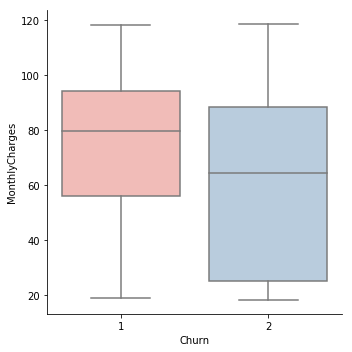

In [38]:
g= sns.factorplot(x="Churn", y = "MonthlyCharges",data = data, kind="box", palette = "Pastel1")

In [43]:
data['TotalCharges'].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(1)
memory usage: 1.1+ MB


In [46]:
## dicari berapa banyak ada " " nya 
len(data[data['TotalCharges'] == " "])

11

In [47]:
## ilangin " " nya
data = data[data['TotalCharges'] != " "]

In [48]:
# (1) pas pertama tak coba convert langsung trs salahnya ada " " sehingga ilangin " " dulu
# (last) kemudian dah bisa di convert ke numerikal
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

c:\users\daris\miniconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
gender              7032 non-null int64
SeniorCitizen       7032 non-null int64
Partner             7032 non-null int64
Dependents          7032 non-null int64
tenure              7032 non-null int64
PhoneService        7032 non-null int64
MultipleLines       7032 non-null int64
InternetService     7032 non-null int64
OnlineSecurity      7032 non-null int64
OnlineBackup        7032 non-null int64
DeviceProtection    7032 non-null int64
TechSupport         7032 non-null int64
StreamingTV         7032 non-null int64
StreamingMovies     7032 non-null int64
Contract            7032 non-null int64
PaperlessBilling    7032 non-null int64
PaymentMethod       7032 non-null int64
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null int64
dtypes: float64(2), int64(18)
memory usage: 1.1 MB


c:\users\daris\miniconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


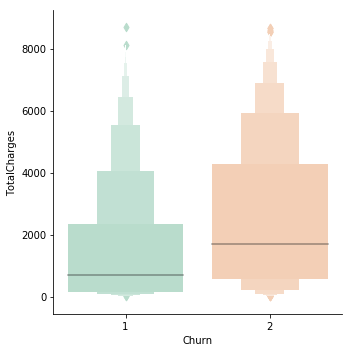

In [50]:
g = sns.factorplot(y="TotalCharges",x="Churn",data=data,kind="boxen", palette = "Pastel2")

In [52]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,2,2,1,2,1,2,3,2,2,1,2,2,2,2,1,1,1,29.85,29.85,2
1,1,2,2,2,34,1,2,2,1,2,1,2,2,2,2,2,2,56.95,1889.50,2
2,1,2,2,2,2,1,2,2,1,1,2,2,2,2,1,1,2,53.85,108.15,1
3,1,2,2,2,45,2,3,2,1,2,1,1,2,2,2,2,3,42.30,1840.75,2
4,2,2,2,2,2,1,2,1,2,2,2,2,2,2,1,1,1,70.70,151.65,1


In [54]:
p=len(data)-1000
print(p)

6032


In [55]:
data.to_csv("Data Telco Proses.csv",index=False)